In [17]:
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import numpy as np
#import cftime

from numpy import *
from scipy import stats
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt #python plotting package
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import nctoolkit
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections  import namedtuple
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon

In [19]:
#Load in CSV of index values from ONI. 1950 - 2024
sst = pd.read_csv('/Users/sofieflom/Downloads/ONI_data.csv')

#Check the data to understand its structure
print(sst.head())

#Melt the data into long format for easier time series plotting
nino_data_melted = pd.melt(sst, id_vars=["Year"], var_name="Month", value_name="Nino_3.4_Anomaly")

#Map month names to month numbers
month_number_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 
    }
nino_data_melted['Month'] = nino_data_melted['Month'].map(month_number_map)

#Create a 'Date' column from 'Year' and 'Month' and convert to datetime format
nino_data_melted['Date'] = pd.to_datetime(nino_data_melted['Year'].astype(str) + '-' + nino_data_melted['Month'].astype(str) + '-01')

#Set Date as index
nino_data_melted.set_index('Date', inplace=True)

#Sort the data by date for consistency
nino_data_melted.sort_index(inplace=True)

#Add a rolling mean and standard deviation for smoothing 
nino_data_melted['Rolling_Mean'] = nino_data_melted['Nino_3.4_Anomaly'].rolling(window=12).mean() #12-month rolling average
nino_data_melted['Rolling_Std'] = nino_data_melted['Nino_3.4_Anomaly'].rolling(window=12).std()
                                          

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1950 -1.53 -1.34 -1.16 -1.18 -1.07 -0.85 -0.54 -0.42 -0.39 -0.44 -0.60   
1  1951 -0.82 -0.54 -0.17  0.18  0.36  0.58  0.70  0.89  0.99  1.15  1.04   
2  1952  0.53  0.37  0.34  0.29  0.20  0.00 -0.08  0.00  0.15  0.10  0.04   
3  1953  0.40  0.60  0.63  0.66  0.75  0.77  0.75  0.73  0.78  0.84  0.84   
4  1954  0.76  0.47 -0.05 -0.41 -0.54 -0.50 -0.64 -0.84 -0.90 -0.77 -0.73   

    Dec  
0 -0.80  
1  0.81  
2  0.15  
3  0.81  
4 -0.66  


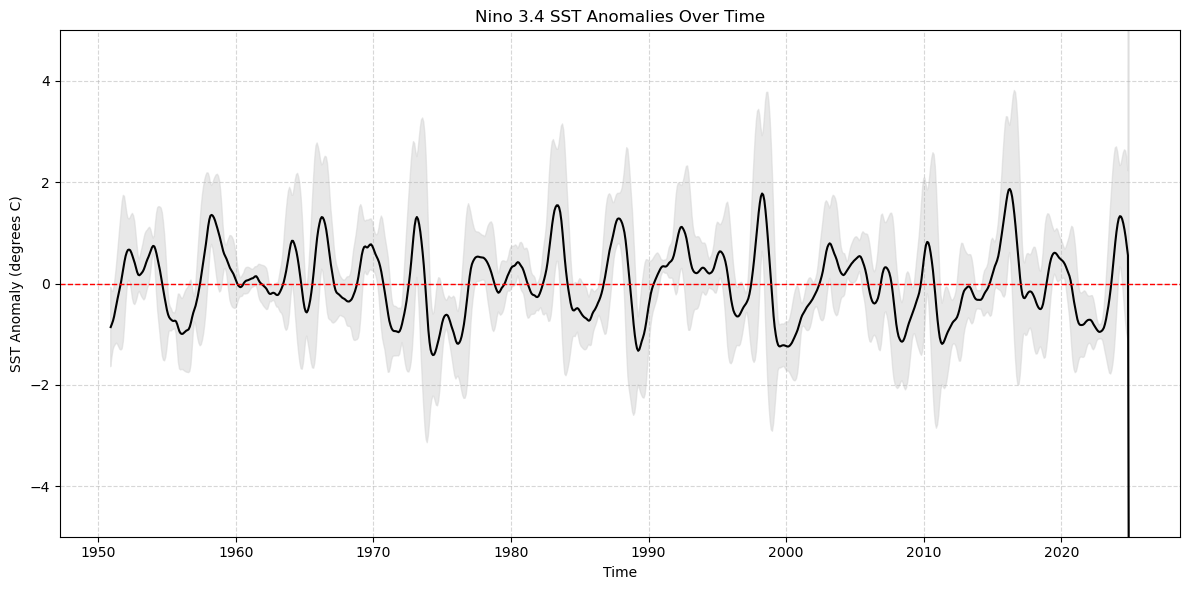

In [21]:
#Plot Nino 3.4 Index (Temp vs Time) 
plt.figure(figsize=(12, 6))
plt.plot(nino_data_melted.index, nino_data_melted['Rolling_Mean'], color='black', linewidth=1.5)
plt.fill_between(
    nino_data_melted.index,
    nino_data_melted['Rolling_Mean'] - 2 * nino_data_melted['Rolling_Std'],
    nino_data_melted['Rolling_Mean'] + 2 * nino_data_melted['Rolling_Std'],
    color = 'lightgrey', alpha=0.5
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

#Add formatting
plt.title("Nino 3.4 SST Anomalies Over Time")
plt.xlabel("Time") 
plt.ylabel("SST Anomaly (degrees C)")
plt.ylim(-5,5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

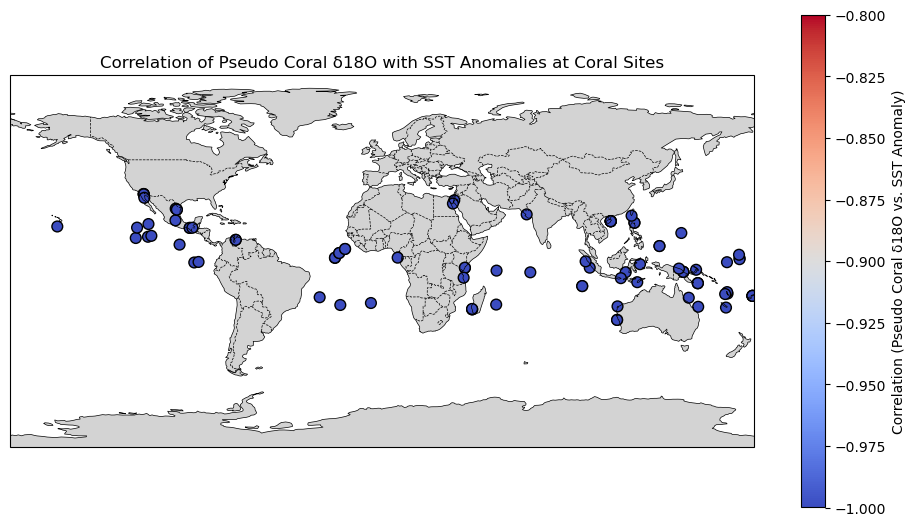

hello
:)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.stats import pearsonr

# Load Nino SST data and coral data
sst_path = '/Users/sofieflom/Downloads/ONI_data.csv'
coral_path = '/Users/sofieflom/Downloads/iso2k_coral.csv'
sst_data = pd.read_csv(sst_path)
coral_data = pd.read_csv(coral_path)

# Melt the SST data 
nino_data_melted = pd.melt(sst_data, id_vars=["Year"], var_name="Month", value_name="Nino_3.4_Anomaly")
month_number_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
nino_data_melted['Month'] = nino_data_melted['Month'].map(month_number_map)
nino_data_melted['Date'] = pd.to_datetime(nino_data_melted['Year'].astype(str) + '-' + nino_data_melted['Month'].astype(str) + '-01')
nino_data_melted.set_index('Date', inplace=True)

# pseudo-coral δ18O calculation
coeff = -0.22  
s180sw = 0.0   
nino_data_melted['Pseudo_Coral_d18O'] = coeff * nino_data_melted['Nino_3.4_Anomaly'] + s180sw

# Aggregate SST and pseudo-coral δ18O by coral site
site_correlations = []
for _, site in coral_data.iterrows():
    site_lat = site['lat']
    site_lon = site['lon']
    
    # Filter SST anomalies for this site's latitude and longitude
    sst_anomalies = nino_data_melted['Nino_3.4_Anomaly']  # Placeholder for site-specific filtering
    
    # Calculate pseudo-coral δ18O for this site
    pseudo_coral_d18O = coeff * sst_anomalies + s180sw
    
    # Calculate correlation
    if len(sst_anomalies) == len(pseudo_coral_d18O):  # Ensure matching lengths
        correlation, _ = pearsonr(sst_anomalies, pseudo_coral_d18O)
        site_correlations.append({
            'lat': site_lat,
            'lon': site_lon,
            'correlation': correlation
        })

# Convert correlations to a DataFrame
correlation_df = pd.DataFrame(site_correlations)

# Plot map with correlations
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)

# Normalize correlation values for the color scale
norm = Normalize(vmin=-1, vmax=-0.8)
cmap = plt.cm.coolwarm

# Scatter plot of coral sites
sc = ax.scatter(
    correlation_df['lon'], 
    correlation_df['lat'], 
    c=correlation_df['correlation'], 
    cmap=cmap, 
    norm=norm, 
    s=60, 
    edgecolor='black', 
    transform=ccrs.PlateCarree()
)

# Add colorbar for correlations
cbar = plt.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, 
    orientation='vertical', 
    label='Correlation (Pseudo Coral δ18O vs. SST Anomaly)',
    shrink=0.8
)

# Add title
ax.set_title("Correlation of Pseudo Coral δ18O with SST Anomalies at Coral Sites")
plt.show()

print("hello")
print(":)")